<a href="https://colab.research.google.com/github/alibekk93/5-a-side-optimisation/blob/master/Five_a_side_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Download and unzip data

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stefanoleone992/fifa-22-complete-player-dataset -f players_22.csv
!unzip players_22.csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/3.29M [00:00<?, ?B/s]
100% 3.29M/3.29M [00:00<00:00, 119MB/s]
Archive:  players_22.csv.zip
  inflating: players_22.csv          


## Imports

In [18]:
import pandas as pd
import random

## Read data

In [19]:
raw_data = pd.read_csv('/content/players_22.csv')
raw_data.head(3)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [6]:
[*raw_data.columns]

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

# Team creation and evaluation

## Positions descriptions and evaluation

In [7]:
skills = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
          'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
          'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
          'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
          'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
          'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
          'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

# these are of course arbitrary, but will do for our purposes
skills_goalkeeper = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']
skills_defender = ['movement_acceleration', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_interceptions',
                   'mentality_positioning', 'power_jumping', 'power_strength']
skills_midfielder = ['attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'power_stamina', 'mentality_vision', 'movement_reactions']
skills_winger = ['attacking_crossing', 'skill_dribbling', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility']
skills_attacker = ['attacking_finishing', 'attacking_heading_accuracy', 'skill_ball_control', 'movement_acceleration', 'power_shot_power', 'mentality_composure']

## Player evaluation

In [8]:
import matplotlib.pyplot as plt

In [9]:
def evaluate_player(sofifa_id, skillset):
  skills = raw_data[raw_data.sofifa_id == sofifa_id][skillset]
  return skills.fillna(0).values.mean()

In [10]:
class Player():
  def __init__(self, sofifa_id):
    self.goalkeeper_skill = evaluate_player(sofifa_id, skills_goalkeeper)
    self.defender_skill = evaluate_player(sofifa_id, skills_defender)
    self.midfielder_skill = evaluate_player(sofifa_id, skills_midfielder)
    self.winger_skill = evaluate_player(sofifa_id, skills_winger)
    self.attacker_skill = evaluate_player(sofifa_id, skills_attacker)
    self.name = raw_data[raw_data.sofifa_id == sofifa_id]['short_name'].iloc[0]
  
  def plot_skills(self):
    skills = pd.Series({'goalkeeper':self.goalkeeper_skill,
                           'defender':self.defender_skill,
                           'midfielder':self.midfielder_skill,
                           'winger':self.winger_skill,
                           'attacker':self.attacker_skill})
    plt.ylim(0, 100)
    plt.title(self.name)
    skills.plot(kind='bar')

## Teams

In [11]:
import random
import numpy as np

In [100]:
class Team():
  def __init__(self):
    self.players = []
  def recruit_players(self, sofifa_ids):
    for sofifa_id in sofifa_ids:
      new_player = Player(sofifa_id)
      self.players.append(new_player)
  def erase_team(self):
    self.players = []
  def random_assignment(self):
    if len(self.players) < 5:
      print('Team only has {} players, recruit {} more'.format(len(self.players), 5-len(self.players)))
    else:
      random_shuffle = random.sample(self.players, k=5)
      self.goalkeeper = random_shuffle[0]
      self.defender = random_shuffle[1]
      self.midfielder = random_shuffle[2]
      self.winger = random_shuffle[3]
      self.attacker = random_shuffle[4]
  def mutate(self, n_mutations=1, reshufle=True):
    for i in range(n_mutations):
      new_player_id = random.choice(list(raw_data.sofifa_id))
      random.choice([self.goalkeeper, self.defender, self.winger,
                   self.midfielder, self.attacker]) = Player(new_player_id)
    # if reshufle:
    #   self.random_assignment()
  def display_team(self):
    strength = pd.Series({'goalkeeper':self.goalkeeper.goalkeeper_skill,
                          'defender':self.defender.defender_skill,
                          'midfielder':self.midfielder.midfielder_skill,
                          'winger':self.winger.winger_skill,
                          'attacker':self.attacker.attacker_skill})
    names = [self.goalkeeper.name, self.defender.name, self.midfielder.name,
             self.winger.name, self.attacker.name]
    plt.ylim(0, 100)
    plt.title("Overall: " + str(strength.mean()))
    plt.bar(range(len(strength)), strength)
    for i, v in enumerate(strength):
      plt.text(i, v, str(names[i]), ha='center', va='bottom')
    print(names)

SyntaxError: ignored

In [96]:
team_x = Team()
random_list = random.sample(list(raw_data.sofifa_id), 5)
team_x.recruit_players(random_list)
team_x.random_assignment()

['P. Banggaard', 'M. Tosetti', 'D. Miya', 'L. Berry', 'O. Ülgün']


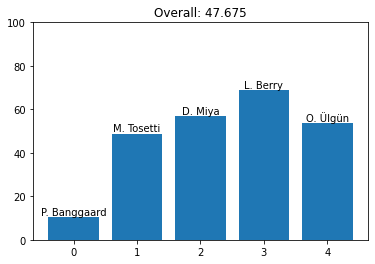

In [97]:
team_x.display_team()

In [98]:
team_x.mutate(2)

['P. Banggaard', 'M. Tosetti', 'D. Miya', 'L. Berry', 'O. Ülgün']


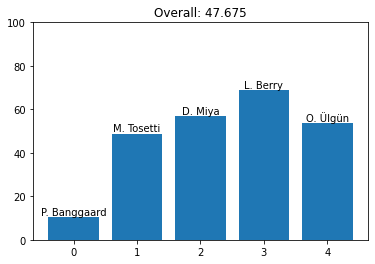

In [99]:
team_x.display_team()